<a href="https://colab.research.google.com/github/CreativeBrian/Crack-Solved/blob/main/Natural_Language_Processing_with_Python_NLTK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [2]:
from google.colab import files
files.upload()

Saving Tweets.csv to Tweets.csv


{'Tweets.csv': b"Date,tweet\r\n;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya 'Wacha Ugali ipoe'\r\n;2014-07-11 23:29;0;0;,The little luhya that remains in me always    Sitokingi kills me\r\n;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weekend wildcat!! #luhya\r\n;2011-10-09 19:34;0;0;,@HomeboyzRadio H.B.R luv dat luhya hit luhyas always kill awoooh\r\n;2015-08-21 09:27;2;3;,#HangOutFriday hahaha ball ya terby( derby)  Luhyas will kill me\r\n;2017-11-19 17:13;2;5;,Luos don\xe2\x80\x99t kill ... blood thirsty killers are those two tribes\r\n;2017-10-14 17:23;0;0;,Same police that kill luos in bondo and shot grannies in migori?\r\n;2017-10-14 16:34;0;0;,But there's provision for police to kill innocent unarmed luos .\r\n;2017-10-13 21:51;0;4;,The gvnt us determined to kill all luos   young and old. Issfine\r\n;2017-09-01 09:28;0;0;,Today events:SCOK & Maraga being an Adventist to uphold Uhuru's \r\n;2016-10-08 22:57;0;0;,@citizentvkenya luos will k

In [4]:
df=pd.read_csv("Tweets.csv", encoding='Windows-1252')
df.head(10)

Date                                              tweet
0  ;2015-08-03 15:35;0;0;  @ComedyCentralKE These words can kill a Luhya ...
1  ;2014-07-11 23:29;0;0;  The little luhya that remains in me always    ...
2  ;2014-02-07 18:36;0;2;  @cheernatwildcat kill it at battle this weeken...
3  ;2011-10-09 19:34;0;0;  @HomeboyzRadio H.B.R luv dat luhya hit luhyas ...
4  ;2015-08-21 09:27;2;3;  #HangOutFriday hahaha ball ya terby( derby)  L...
5  ;2017-11-19 17:13;2;5;  Luos donâ€™t kill ... blood thirsty killers ar...
6  ;2017-10-14 17:23;0;0;  Same police that kill luos in bondo and shot g...
7  ;2017-10-14 16:34;0;0;  But there's provision for police to kill innoc...
8  ;2017-10-13 21:51;0;4;  The gvnt us determined to kill all luos   youn...
9  ;2017-09-01 09:28;0;0;  Today events:SCOK & Maraga being an Adventist ...

In [5]:
#Removing Punctuations

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['tweet_wo_punct']=df['tweet'].apply(lambda x: remove_punctuation(x))
df.head()

Date                                              tweet  \
0  ;2015-08-03 15:35;0;0;  @ComedyCentralKE These words can kill a Luhya ...   
1  ;2014-07-11 23:29;0;0;  The little luhya that remains in me always    ...   
2  ;2014-02-07 18:36;0;2;  @cheernatwildcat kill it at battle this weeken...   
3  ;2011-10-09 19:34;0;0;  @HomeboyzRadio H.B.R luv dat luhya hit luhyas ...   
4  ;2015-08-21 09:27;2;3;  #HangOutFriday hahaha ball ya terby( derby)  L...   

                                      tweet_wo_punct  
0  ComedyCentralKE These words can kill a Luhya W...  
1  The little luhya that remains in me always    ...  
2  cheernatwildcat kill it at battle this weekend...  
3  HomeboyzRadio HBR luv dat luhya hit luhyas alw...  
4  HangOutFriday hahaha ball ya terby derby  Luhy...

In [12]:
#Remove non-alphanumeric characters

In [13]:
df.tweet_wo_punct.str.replace('[^a-zA-Z0-9]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0        ComedyCentralKEThesewordscankillaLuhyaWachaUga...
1        ThelittleluhyathatremainsinmealwaysSitokingiki...
2        cheernatwildcatkillitatbattlethisweekendwildca...
3        HomeboyzRadioHBRluvdatluhyahitluhyasalwayskill...
4        HangOutFridayhahahaballyaterbyderbyLuhyaswillk...
                               ...                        
20015    symokurayalolYahthepricesareexorbitantHaoniwac...
20016    jalangomwenyewehaowakisiiwafunguliweradiostati...
20017    Stopharbouringhatredwesohateoneanotherespecial...
20018    youseemtohatekikuyusnyounicknameyourselfkikuyu...
20019    WhywouldtheseKikuyuswhoweretaughttohateLuosgot...
Name: tweet_wo_punct, Length: 20020, dtype: object

In [14]:
#Tokenizing

In [15]:
import re

def tokenize(txt):
  tokens= re.split('\W+',txt)
  return tokens
df['tweet_wo_punct_tokenized'] = df['tweet_wo_punct'].apply(lambda x:tokenize(x.lower()))
df.head(10)

Date                                              tweet  \
0  ;2015-08-03 15:35;0;0;  @ComedyCentralKE These words can kill a Luhya ...   
1  ;2014-07-11 23:29;0;0;  The little luhya that remains in me always    ...   
2  ;2014-02-07 18:36;0;2;  @cheernatwildcat kill it at battle this weeken...   
3  ;2011-10-09 19:34;0;0;  @HomeboyzRadio H.B.R luv dat luhya hit luhyas ...   
4  ;2015-08-21 09:27;2;3;  #HangOutFriday hahaha ball ya terby( derby)  L...   
5  ;2017-11-19 17:13;2;5;  Luos donâ€™t kill ... blood thirsty killers ar...   
6  ;2017-10-14 17:23;0;0;  Same police that kill luos in bondo and shot g...   
7  ;2017-10-14 16:34;0;0;  But there's provision for police to kill innoc...   
8  ;2017-10-13 21:51;0;4;  The gvnt us determined to kill all luos   youn...   
9  ;2017-09-01 09:28;0;0;  Today events:SCOK & Maraga being an Adventist ...   

                                      tweet_wo_punct  \
0  ComedyCentralKE These words can kill a Luhya W...   
1  The little luhya that remains in me always    ...   
2  cheernatwildcat kill it at battle this weekend...   
3  HomeboyzRadio HBR luv dat luhya hit luhyas alw...   
4  HangOutFriday hahaha ball ya terby derby  Luhy...   
5  Luos donâ€™t kill  blood thirsty killers are t...   
6  Same police that kill luos in bondo and shot g...   
7  But theres provision for police to kill innoce...   
8  The gvnt us determined to kill all luos   youn...   
9  Today eventsSCOK  Maraga being an Adventist to...   

                            tweet_wo_punct_tokenized  
0  [comedycentralke, these, words, can, kill, a, ...  
1  [the, little, luhya, that, remains, in, me, al...  
2  [cheernatwildcat, kill, it, at, battle, this, ...  
3  [homeboyzradio, hbr, luv, dat, luhya, hit, luh...  
4  [hangoutfriday, hahaha, ball, ya, terby, derby...  
5  [luos, donâ, t, kill, blood, thirsty, killers,...  
6  [same, police, that, kill, luos, in, bondo, an...  
7  [but, theres, provision, for, police, to, kill...  
8  [the, gvnt, us, determined, to, kill, all, luo...  
9  [today, eventsscok, maraga, being, an, adventi...

In [16]:
df1=df.copy()

In [17]:
#Find the number of unique words in the file

In [18]:
from collections import Counter
results=Counter()
df1['tweet_wo_punct']=df1['tweet_wo_punct'].str.lower().str.split().apply(results.update)
print(results)

Counter({'are': 5631, 'the': 5071, 'to': 3274, 'is': 2851, 'you': 2588, 'a': 2434, 'and': 2204, 'i': 2024, 'of': 2020, 'in': 2007, 'nyakundi': 1706, 'kikuyus': 1584, 'we': 1434, 'this': 1411, 'for': 1344, 'noreformsnoelections': 1277, 'luos': 1243, 'not': 1230, 'https': 1155, 'all': 1152, 'that': 1127, 'â€¦': 1106, 'on': 1093, 'be': 1070, 'they': 1006, 'it': 964, 'ripmsando': 836, 'will': 830, 'with': 812, 'so': 768, 'hawa': 764, 'rt': 703, 'ni': 702, 'have': 692, 'what': 689, 'my': 680, 'na': 672, 'maasai': 660, 'but': 657, 'masai': 654, 'your': 635, 'just': 633, 'who': 624, 'luolivesmatter': 612, 'no': 605, 'he': 580, 'kenya': 573, 'http': 570, 'wembeniuleule': 564, 'electionsboycottke': 561, 'railapresser': 558, 'like': 554, 'luhyas': 532, 'me': 526, 'people': 522, 'now': 505, 'its': 498, 'why': 495, 'at': 490, 'from': 490, 'chase': 490, 'how': 489, 'do': 478, 'hate': 478, 'only': 467, 'dont': 464, 'as': 459, 'one': 457, 'should': 446, 'if': 438, 'by': 434, 'ya': 433, 'was': 432, 'h

In [19]:
print(len(results))

31704


In [21]:
#Find the top 10 most frequent tokens in the file.

In [22]:
df2=pd.DataFrame(results.most_common(10),columns={'words','count'})
df2

words  count
0   are   5631
1   the   5071
2    to   3274
3    is   2851
4   you   2588
5     a   2434
6   and   2204
7     i   2024
8    of   2020
9    in   2007

In [23]:
#Remove empty rows and duplicates

In [24]:
df.isna().sum()

Date                        0
tweet                       0
tweet_wo_punct              0
tweet_wo_punct_tokenized    0
dtype: int64

In [25]:
def remove_duplicates(duplist):
  noduplist=[]
  for element in duplist:
    if element not in noduplist:
      noduplist.append(element)

remove_duplicates([df['tweet_wo_punct_tokenized']])

In [26]:
df

Date  \
0      ;2015-08-03 15:35;0;0;   
1      ;2014-07-11 23:29;0;0;   
2      ;2014-02-07 18:36;0;2;   
3      ;2011-10-09 19:34;0;0;   
4      ;2015-08-21 09:27;2;3;   
...                       ...   
20015  ;2012-04-17 17:20;0;0;   
20016  ;2014-02-11 06:37;0;1;   
20017  ;2017-11-02 14:34;0;0;   
20018  ;2017-10-27 06:51;0;0;   
20019  ;2017-10-17 13:48;0;0;   

                                                   tweet  \
0      @ComedyCentralKE These words can kill a Luhya ...   
1      The little luhya that remains in me always    ...   
2      @cheernatwildcat kill it at battle this weeken...   
3      @HomeboyzRadio H.B.R luv dat luhya hit luhyas ...   
4      #HangOutFriday hahaha ball ya terby( derby)  L...   
...                                                  ...   
20015  @symokuraya lol  Yah the prices are exorbitant...   
20016  @jalangomwenyewe hao wakisii wafunguliwe radio...   
20017  Stop harbouring hatred  we so hate one another...   
20018  you seem to hate kikuyus n you nickname yourse...   
20019  Why would these Kikuyus  who were taught to ha...   

                                          tweet_wo_punct  \
0      ComedyCentralKE These words can kill a Luhya W...   
1      The little luhya that remains in me always    ...   
2      cheernatwildcat kill it at battle this weekend...   
3      HomeboyzRadio HBR luv dat luhya hit luhyas alw...   
4      HangOutFriday hahaha ball ya terby derby  Luhy...   
...                                                  ...   
20015  symokuraya lol  Yah the prices are exorbitant ...   
20016  jalangomwenyewe hao wakisii wafunguliwe radio ...   
20017  Stop harbouring hatred  we so hate one another...   
20018  you seem to hate kikuyus n you nickname yourse...   
20019  Why would these Kikuyus  who were taught to ha...   

                                tweet_wo_punct_tokenized  
0      [comedycentralke, these, words, can, kill, a, ...  
1      [the, little, luhya, that, remains, in, me, al...  
2      [cheernatwildcat, kill, it, at, battle, this, ...  
3      [homeboyzradio, hbr, luv, dat, luhya, hit, luh...  
4      [hangoutfriday, hahaha, ball, ya, terby, derby...  
...                                                  ...  
20015  [symokuraya, lol, yah, the, prices, are, exorb...  
20016  [jalangomwenyewe, hao, wakisii, wafunguliwe, r...  
20017  [stop, harbouring, hatred, we, so, hate, one, ...  
20018  [you, seem, to, hate, kikuyus, n, you, nicknam...  
20019  [why, would, these, kikuyus, who, were, taught...  

[20020 rows x 4 columns]

In [27]:
#Remove stop words

In [31]:
#Find the Stop Words

In [28]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [30]:
#Remove

In [29]:
def remove_stopwords(txt_tokenized):
  txt_clean = [word for word in txt_tokenized if word not in stopwords]
  return txt_clean

df['tweet_wo_punct_tokenized_no_sw'] =df['tweet_wo_punct_tokenized'].apply(lambda x: remove_stopwords(x))
df.head() 

Date                                              tweet  \
0  ;2015-08-03 15:35;0;0;  @ComedyCentralKE These words can kill a Luhya ...   
1  ;2014-07-11 23:29;0;0;  The little luhya that remains in me always    ...   
2  ;2014-02-07 18:36;0;2;  @cheernatwildcat kill it at battle this weeken...   
3  ;2011-10-09 19:34;0;0;  @HomeboyzRadio H.B.R luv dat luhya hit luhyas ...   
4  ;2015-08-21 09:27;2;3;  #HangOutFriday hahaha ball ya terby( derby)  L...   

                                      tweet_wo_punct  \
0  ComedyCentralKE These words can kill a Luhya W...   
1  The little luhya that remains in me always    ...   
2  cheernatwildcat kill it at battle this weekend...   
3  HomeboyzRadio HBR luv dat luhya hit luhyas alw...   
4  HangOutFriday hahaha ball ya terby derby  Luhy...   

                            tweet_wo_punct_tokenized  \
0  [comedycentralke, these, words, can, kill, a, ...   
1  [the, little, luhya, that, remains, in, me, al...   
2  [cheernatwildcat, kill, it, at, battle, this, ...   
3  [homeboyzradio, hbr, luv, dat, luhya, hit, luh...   
4  [hangoutfriday, hahaha, ball, ya, terby, derby...   

                      tweet_wo_punct_tokenized_no_sw  
0  [comedycentralke, words, kill, luhya, wacha, u...  
1  [little, luhya, remains, always, sitokingi, ki...  
2  [cheernatwildcat, kill, battle, weekend, wildc...  
3  [homeboyzradio, hbr, luv, dat, luhya, hit, luh...  
4  [hangoutfriday, hahaha, ball, ya, terby, derby...

In [32]:
#Perform a Part of speech tagging

In [33]:
df['tweet_wo_punct_tokenized_no_sw']=df['tweet_wo_punct_tokenized_no_sw'].astype('string')

In [34]:
df.dtypes

Date                              object
tweet                             object
tweet_wo_punct                    object
tweet_wo_punct_tokenized          object
tweet_wo_punct_tokenized_no_sw    string
dtype: object

In [35]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
list1= df['tweet_wo_punct_tokenized_no_sw'].tolist()
string1="".join(list1)
tokens = nltk.sent_tokenize(string1)
print("Parts of Speech",nltk.pos_tag(tokens))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Parts of Speech [("['comedycentralke', 'words', 'kill', 'luhya', 'wacha', 'ugali', 'ipoe']['little', 'luhya', 'remains', 'always', 'sitokingi', 'kills']['cheernatwildcat', 'kill', 'battle', 'weekend', 'wildcat', 'luhya']['homeboyzradio', 'hbr', 'luv', 'dat', 'luhya', 'hit', 'luhyas', 'always', 'kill', 'awoooh']['hangoutfriday', 'hahaha', 'ball', 'ya', 'terby', 'derby', 'luhyas', 'kill']['luos', 'donâ', 'kill', 'blood', 'thirsty', 'killers', 'two', 'tribes']['police', 'kill', 'luos', 'bondo', 'shot', 'grannies', 'migori']['theres', 'provision', 'police', 'kill', 'innocent', 'unarmed', 'luos', '']['gvnt', 'us', 'determined', 'kill', 'luos', 'young', 'old', 'issfine']['today', 'eventsscok', 'maraga', 'adventist', 'uphold', 'uh

In [36]:
#Create a word cloud of the cleaned data

In [37]:
#(a) First convert the column into a list

In [38]:
list1= df['tweet_wo_punct_tokenized_no_sw'].tolist()

In [39]:
#(b) Convert the List into a string

In [40]:
string1="".join(list1)

In [41]:
#(c) Generate the word cloud

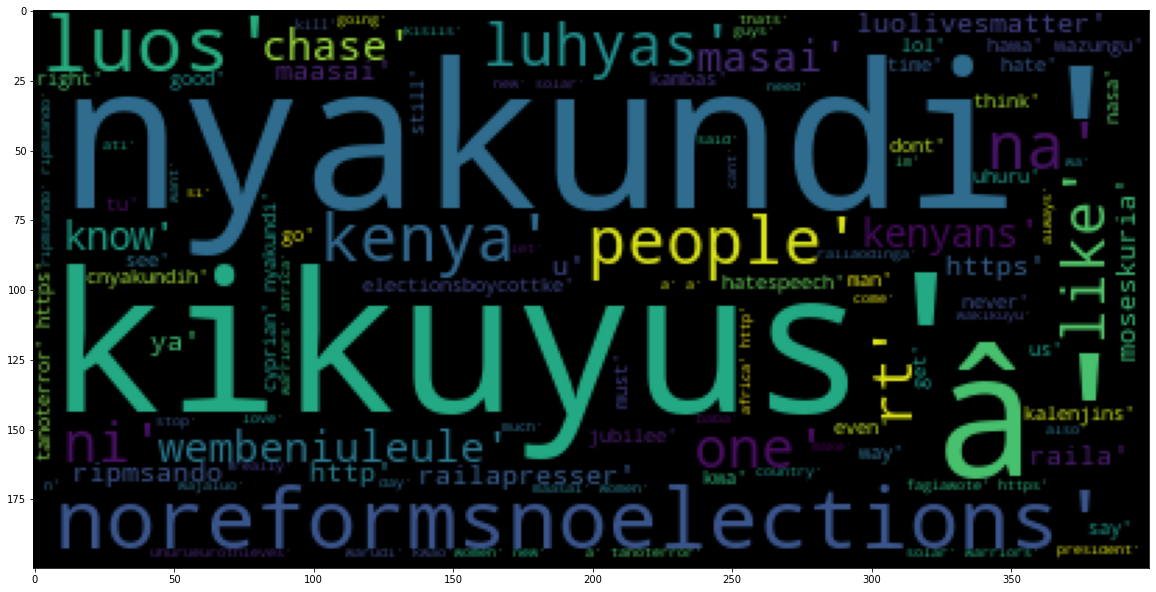

In [42]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string1))